Random Forest Regression on titanic dataset

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
dataset=pd.read_csv("./Data/titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
rmv_cols=['PassengerId','Name','Ticket','Cabin','Embarked']
data=dataset.drop(rmv_cols,axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
mapping_sex = {
    'male' : 0 ,
    'female' : 1
}
data.Sex = data.Sex.map(mapping_sex)

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [8]:
data=data.dropna()
print(data.shape)

(714, 7)


<AxesSubplot:>

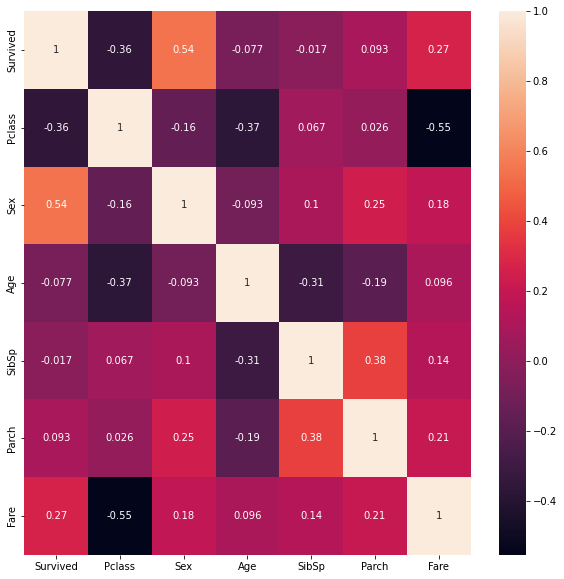

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [10]:
y=data.Survived
x=data.drop('Survived',axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(571, 6) (143, 6) (571,) (143,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
score=rf.score(x_test,y_test)
score

0.7832167832167832

In [14]:
test_vector = np.array([3,1,26.0,0,0,7.9250])
test_vector = np.reshape(test_vector,(1,6))
print(test_vector)
test_vector.shape

[[ 3.     1.    26.     0.     0.     7.925]]


(1, 6)

In [15]:
Y_pred = rf.predict(test_vector)
print(Y_pred)

[1]


C:\Users\Harsh Ranjan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
y_pred = rf.predict(x_test)

cmp = np.array([y_pred,y_test])
cmp = cmp.reshape(len(y_pred),2)
#print(cmp)

In [17]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[74 19]
 [12 38]]


Text(0.5, 1.0, 'Accuracy Score: 0.7832167832167832')

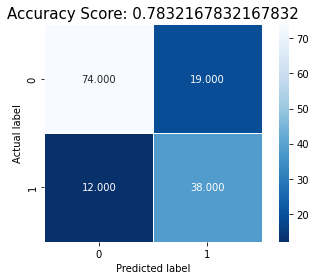

In [18]:
#plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)